In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
df = pd.read_csv('../experiments/sw-data/AMD_Ryzen_7_5800X.csv')

df['throughput'] = df['bytes_in'] / df['time']
df.set_index(['framework', 'api', 'allocated', 'max_values', 'num_jsons'], inplace=True)
display(df)


bytes_in  \
framework       api           allocated max_values num_jsons             
simdjson        DOM           False     1          1024          18878   
                              True      1          1024          18878   
                DOM (no keys) True      1          1024          18878   
RapidJSON       DOM           False     1          1024          18878   
                DOM (in situ) False     1          1024          18878   
...                                                                ...   
                SAX           True      128        1024         307040   
Custom          NaN           True      128        1024         307040   
                              False     128        1024         307040   
ANTLR4          NaN           False     128        1024         307040   
Boost Spirit.X3 NaN           False     128        1024         307040   

                                                              bytes_out  \
framework       api           allocated max_values num_jsons              
simdjson        DOM           False     1          1024            8192   
                              True      1          1024            8192   
                DOM (no keys) True      1          1024            8192   
RapidJSON       DOM           False     1          1024            8192   
                DOM (in situ) False     1          1024            8192   
...                                                                 ...   
                SAX           True      128        1024          525360   
Custom          NaN           True      128        1024          525360   
                              False     128        1024          525360   
ANTLR4          NaN           False     128        1024          525360   
Boost Spirit.X3 NaN           False     128        1024          525360   

                                                                  time  \
framework       api           allocated max_values num_jsons             
simdjson        DOM           False     1          1024       0.000047   
                              True      1          1024       0.000030   
                DOM (no keys) True      1          1024       0.000034   
RapidJSON       DOM           False     1          1024       0.000079   
                DOM (in situ) False     1          1024       0.000068   
...                                                                ...   
                SAX           True      128        1024       0.000660   
Custom          NaN           True      128        1024       0.000339   
                              False     128        1024       0.000454   
ANTLR4          NaN           False     128        1024       0.040948   
Boost Spirit.X3 NaN           False     128        1024       0.000737   

                                                                throughput  
framework       api           allocated max_values num_jsons                
simdjson        DOM           False     1          1024       3.996105e+08  
                              True      1          1024       6.240455e+08  
                DOM (no keys) True      1          1024       5.536070e+08  
RapidJSON       DOM           False     1          1024       2.395047e+08  
                DOM (in situ) False     1          1024       2.792975e+08  
...                                                                    ...  
                SAX           True      128        1024       4.652051e+08  
Custom          NaN           True      128        1024       9.055491e+08  
                              False     128        1024       6.762727e+08  
ANTLR4          NaN           False     128        1024       7.498217e+06  
Boost Spirit.X3 NaN           False     128        1024       4.167255e+08  

[88 rows x 4 columns]

In [52]:
df = df.groupby(['framework']).agg({'throughput':'max'})
df.sort_values(by='throughput', inplace=True)
df['Throughput (GB/s)'] = df.throughput * 1e-9
display(df)

,throughput,Throughput (GB/s)
framework,,
ANTLR4,1.313015e+07,0.013130
RapidJSON,5.633542e+08,0.563354
simdjson,7.131578e+08,0.713158
Boost Spirit.X3,9.159187e+08,0.915919
Custom,2.940498e+09,2.940498


<AxesSubplot:xlabel='framework'>

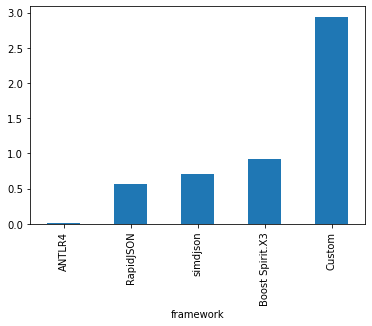

In [53]:
df['Throughput (GB/s)'].plot.bar()